<a href="https://colab.research.google.com/github/mradulkankaria/Capstone-1/blob/main/Regression_Yes_Bank_Stock_Closing_Price_Prediction_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Mradul Kankaria


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/mradulkankaria/Capstone-1/blob/main/Regression_Yes_Bank_Stock_Closing_Price_Prediction_Submission_Template.ipynb

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


### Dataset Loading

In [2]:
# Load Dataset
start = '2005-07-01'
end = '2020-11-01'
stock = 'YESBANK.BO'

In [3]:
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


### Dataset First View

In [4]:
# Dataset First Look
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-07-13,12.29,12.47,11.48,11.70,7.670772,28784240
2005-07-14,11.88,11.96,11.40,11.46,7.513423,6810720
2005-07-15,11.56,12.88,11.25,12.35,8.096925,36693185
2005-07-18,12.56,13.13,12.47,12.85,8.424737,30424025
2005-07-19,12.98,12.98,12.62,12.81,8.398512,10596800
...,...,...,...,...,...,...
2020-10-26,14.01,14.01,12.90,13.14,13.140000,49433450
2020-10-27,13.11,13.11,12.72,12.84,12.840000,18143660
2020-10-28,12.85,12.85,12.50,12.52,12.520000,12498650


In [5]:
data.reset_index(inplace = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,12.29,12.47,11.48,11.70,7.670772,28784240
1,2005-07-14,11.88,11.96,11.40,11.46,7.513423,6810720
2,2005-07-15,11.56,12.88,11.25,12.35,8.096925,36693185
3,2005-07-18,12.56,13.13,12.47,12.85,8.424737,30424025
4,2005-07-19,12.98,12.98,12.62,12.81,8.398512,10596800
...,...,...,...,...,...,...,...
3756,2020-10-26,14.01,14.01,12.90,13.14,13.140000,49433450
3757,2020-10-27,13.11,13.11,12.72,12.84,12.840000,18143660
3758,2020-10-28,12.85,12.85,12.50,12.52,12.520000,12498650
3759,2020-10-29,12.25,12.45,12.11,12.39,12.390000,15723440


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
data.shape

(3761, 7)

### Dataset Information

In [7]:
# Dataset Info
data.info

<bound method DataFrame.info of            Date   Open   High    Low  Close  Adj Close    Volume
0    2005-07-13  12.29  12.47  11.48  11.70   7.670772  28784240
1    2005-07-14  11.88  11.96  11.40  11.46   7.513423   6810720
2    2005-07-15  11.56  12.88  11.25  12.35   8.096925  36693185
3    2005-07-18  12.56  13.13  12.47  12.85   8.424737  30424025
4    2005-07-19  12.98  12.98  12.62  12.81   8.398512  10596800
...         ...    ...    ...    ...    ...        ...       ...
3756 2020-10-26  14.01  14.01  12.90  13.14  13.140000  49433450
3757 2020-10-27  13.11  13.11  12.72  12.84  12.840000  18143660
3758 2020-10-28  12.85  12.85  12.50  12.52  12.520000  12498650
3759 2020-10-29  12.25  12.45  12.11  12.39  12.390000  15723440
3760 2020-10-30  12.40  12.60  12.31  12.42  12.420000   9443781

[3761 rows x 7 columns]>

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# Visualizing the missing values

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
# Dataset Describe
data.describe(include = 'all' )

<ipython-input-12-1625af401a22>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = 'all' )


,Date,Open,High,Low,Close,Adj Close,Volume
count,3761,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3.761000e+03
unique,3761,NaN,NaN,NaN,NaN,NaN,NaN
top,2005-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2005-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,106.450261,108.210689,104.451420,106.215485,94.365278,3.655679e+06
std,NaN,98.953893,100.151982,97.578191,98.784724,99.485124,8.706960e+06
min,NaN,8.490000,8.490000,5.550000,8.290000,5.435103,4.240500e+04
25%,NaN,32.799999,33.799999,31.600000,32.660000,23.477806,8.269000e+05


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")

No. of unique values in  Date is 3761 .
No. of unique values in  Open is 2498 .
No. of unique values in  High is 2973 .
No. of unique values in  Low is 2937 .
No. of unique values in  Close is 3290 .
No. of unique values in  Adj Close is 3470 .
No. of unique values in  Volume is 3749 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
data.dropna(inplace=True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

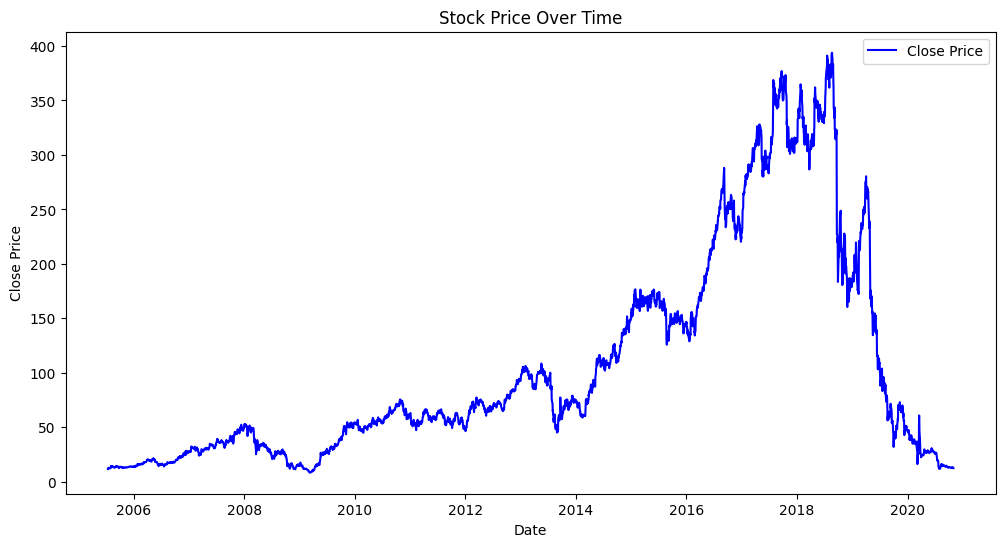

In [15]:
# Chart - 1 visualization code
import seaborn as sns

# Line chart for Date and Close
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

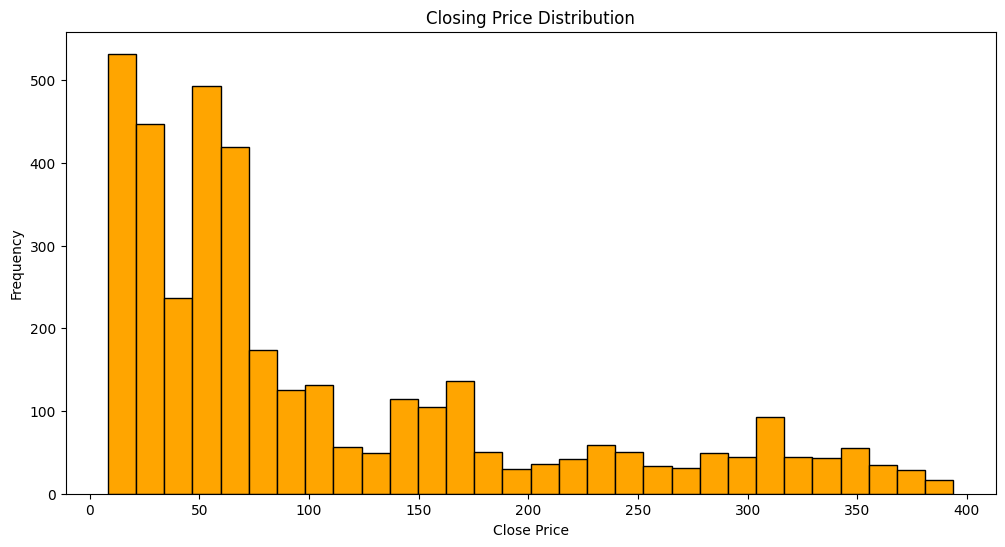

In [16]:
# Chart - 2 visualization code
# Histogram for Closing Price Distribution
plt.figure(figsize=(12, 6))
plt.hist(data['Close'], bins=30, color='orange', edgecolor='black')
plt.title('Closing Price Distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()



<ipython-input-17-cb15acf50245>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'],color='y')


<Axes: xlabel='Close', ylabel='Density'>

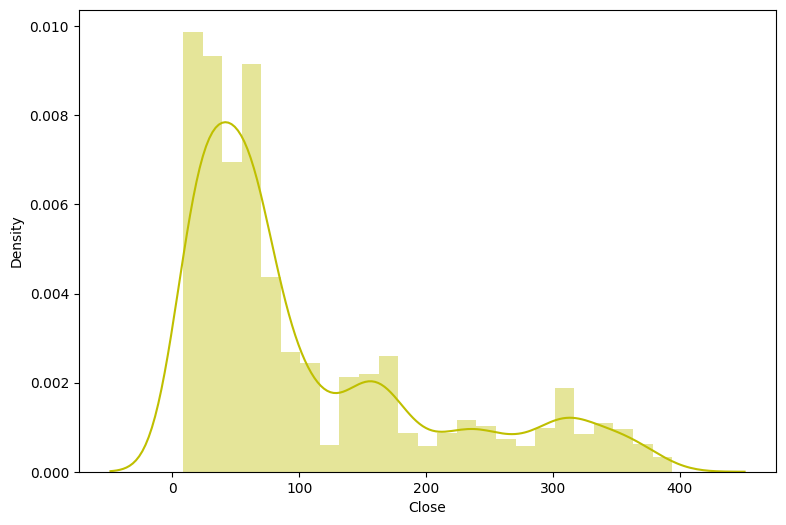

In [17]:
plt.figure(figsize=(9,6))
sns.distplot(data['Close'],color='y')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

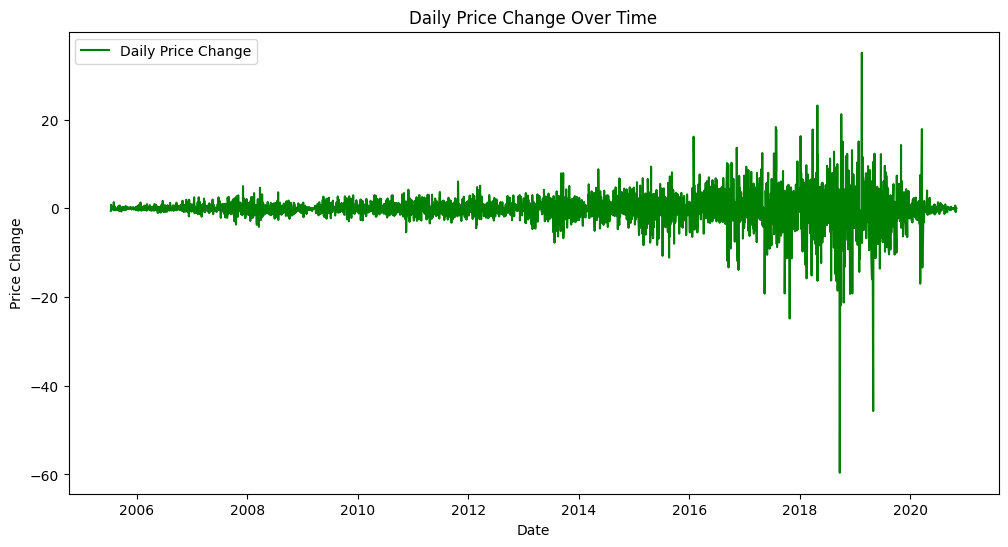

In [17]:
# Line chart for Daily Price Change
data['Daily Change'] = data['Close'] - data['Open']
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Daily Change'], label='Daily Price Change', color='green')
plt.title('Daily Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [18]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [19]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [20]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [21]:
# There are no missing values in the data

### 2. Handling Outliers

In [22]:
# Handling Outliers & Outlier treatments
# This data is of a stock, outliers are needed for model accuracy

### 3. Categorical Encoding

In [23]:
# Encode your categorical columns
# Encoding is not needed because there are no categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

In [24]:
# calculating 100 days moveing avg
# A moving average (MA) is a technical indicator
# that analyzes data points by creating a series of averages of different
# selections of the full data set. It is also called a moving mean or rolling mean.
ma_100_days = data.Close.rolling(100).mean()

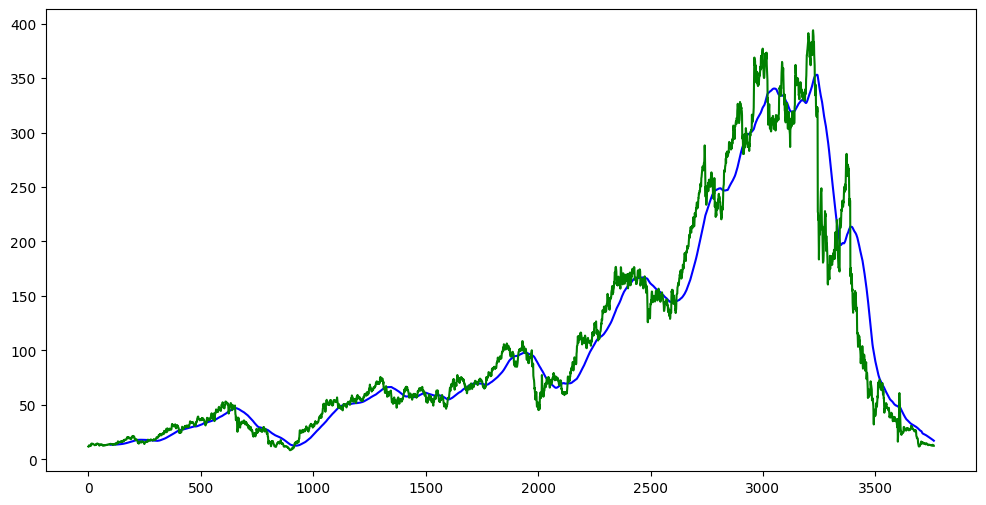

In [25]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [26]:
ma_200_days = data.Close.rolling(200).mean()

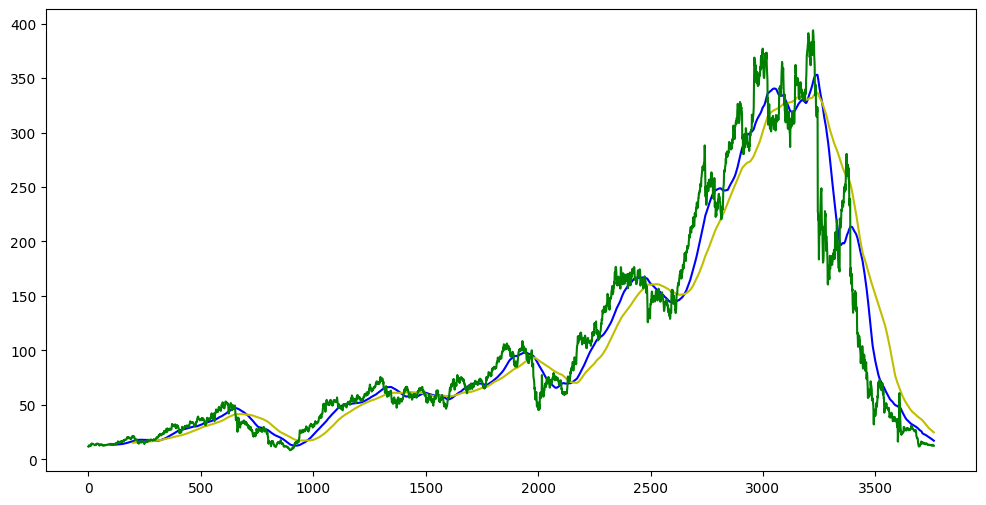

In [27]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'b')
plt.plot(ma_200_days, 'y')
plt.plot(data.Close,'g')
plt.show()

## ***6. Training and Testing Data***

In [28]:
#Spliting data for traning and testing
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_train.shape[0]

3008

In [29]:
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])
data_test.shape[0]

753

Scaleing the data set

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) #data scaled in between 0 to 1


In [41]:
data_train_scale = scaler.fit_transform(data_train)

In [42]:
data_test_scale = scaler.fit_transform(data_test)

In [43]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [44]:
x, y = np.array(x), np.array(y)

In [46]:
x,y

(array([[[0.00924846],
         [0.00859754],
         [0.01101137],
         ...,
         [0.01564916],
         [0.01592037],
         [0.01605598]],
 
        [[0.00859754],
         [0.01101137],
         [0.01236744],
         ...,
         [0.01592037],
         [0.01605598],
         [0.01535082]],
 
        [[0.01101137],
         [0.01236744],
         [0.01225896],
         ...,
         [0.01605598],
         [0.01535082],
         [0.01562203]],
 
        ...,
 
        [[0.84692576],
         [0.84481028],
         [0.83415152],
         ...,
         [0.95484258],
         [0.93585747],
         [0.92894141]],
 
        [[0.84481028],
         [0.83415152],
         [0.78240349],
         ...,
         [0.93585747],
         [0.92894141],
         [0.92677172]],
 
        [[0.83415152],
         [0.78240349],
         [0.77570445],
         ...,
         [0.92894141],
         [0.92677172],
         [0.92839903]]]),
 array([0.01535082, 0.01562203, 0.01564916, ..., 0.9267

## ***7. ML Model Implementation***

### ML Model - 1

In [30]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [47]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [48]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [49]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
91/91 [==============================] - 32s 281ms/step - loss: 0.0168
Epoch 2/50
91/91 [==============================] - 26s 283ms/step - loss: 0.0036
Epoch 3/50
91/91 [==============================] - 27s 301ms/step - loss: 0.0034
Epoch 4/50
91/91 [==============================] - 27s 302ms/step - loss: 0.0035
Epoch 5/50
91/91 [==============================] - 26s 285ms/step - loss: 0.0030
Epoch 6/50
91/91 [==============================] - 26s 289ms/step - loss: 0.0026
Epoch 7/50
91/91 [==============================] - 27s 289ms/step - loss: 0.0025
Epoch 8/50
91/91 [==============================] - 26s 287ms/step - loss: 0.0026
Epoch 9/50
91/91 [==============================] - 26s 286ms/step - loss: 0.0031
Epoch 10/50
91/91 [==============================] - 26s 283ms/step - loss: 0.0024
Epoch 11/50
91/91 [==============================] - 26s 282ms/step - loss: 0.0026
Epoch 12/50
91/91 [==============================] - 26s 283ms/step - loss: 0.0021
Epoch 13/50
9

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [51]:
pas_100_days = data_train.tail(100)

In [52]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [62]:
data_test_scale  =  scaler.fit_transform(data_test)

In [63]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [64]:
y_predict = model.predict(x)

24/24 [==============================] - 2s 82ms/step


In [65]:
scaler.scale_

array([0.00261712])

In [66]:
scale =1/scaler.scale_

In [67]:
y_predict = y_predict*scale


In [68]:
y = y*scale

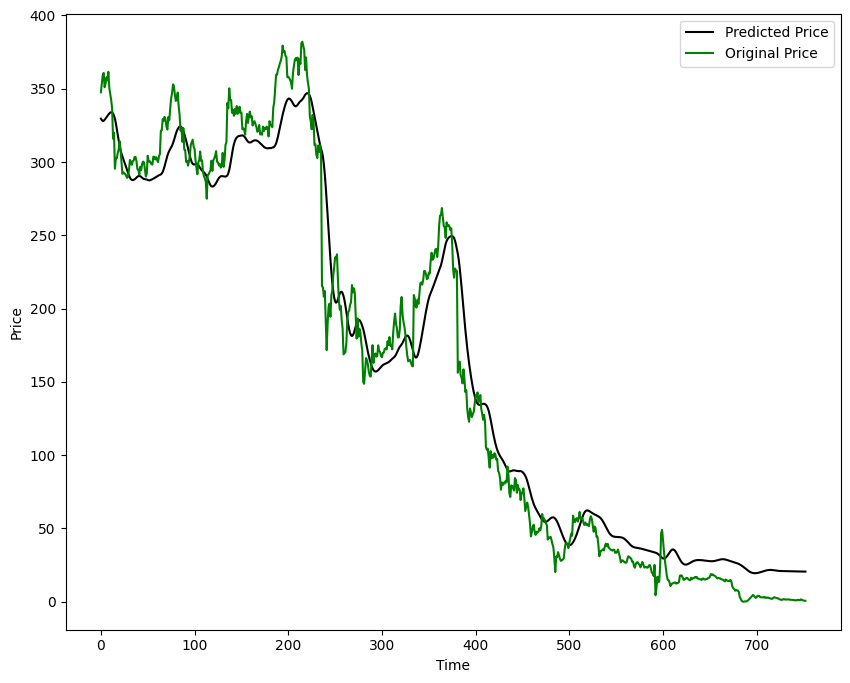

In [74]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'black', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [31]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [32]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

Epoch 1/50
19/19 [==============================] - 10s 253ms/step - loss: 405810304.0000
Epoch 2/50
19/19 [==============================] - 6s 316ms/step - loss: 42008.6328
Epoch 3/50
19/19 [==============================] - 5s 251ms/step - loss: 41254428.0000
Epoch 4/50
19/19 [==============================] - 5s 271ms/step - loss: 42037.6602
Epoch 5/50
19/19 [==============================] - 6s 288ms/step - loss: 42044.9141
Epoch 6/50
19/19 [==============================] - 5s 251ms/step - loss: 42045.6055
Epoch 7/50
19/19 [==============================] - 6s 316ms/step - loss: 42045.1680
Epoch 8/50
19/19 [==============================] - 5s 252ms/step - loss: 42045.2539
Epoch 9/50
19/19 [==============================] - 6s 317ms/step - loss: 42044.3594
Epoch 10/50
19/19 [==============================] - 5s 256ms/step - loss: 42043.3867
Epoch 11/50
19/19 [==============================] - 5s 252ms/step - loss: 42043.6328
Epoch 12/50
19/19 [==============================] - 6s

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


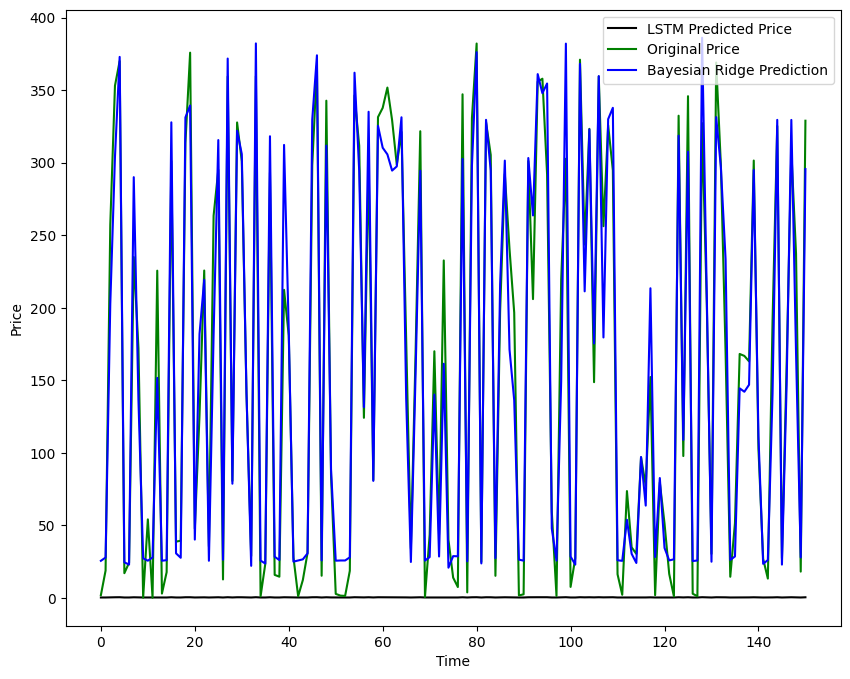

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import BayesianRidge
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

# Assuming x and y are your input features and target variable
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the Keras LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the Keras model
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_predict = model.predict(x_test)

# Flatten the LSTM output
y_predict_flat = y_predict.flatten()
y_test_flat = y_test.flatten()

# Reshape for Bayesian Ridge Regression
y_predict_flat = y_predict_flat.reshape(-1, 1)
y_test_flat = y_test_flat.reshape(-1, 1)

# Fit Bayesian Ridge Regression model
bayesian_model = BayesianRidge()
bayesian_model.fit(y_predict_flat, y_test_flat)

# Predict on the test set using Bayesian Ridge Regression
y_predict_bayesian = bayesian_model.predict(y_predict_flat)

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(y_predict_flat, 'black', label='LSTM Predicted Price')
plt.plot(y_test_flat, 'g', label='Original Price')
plt.plot(y_predict_bayesian, 'b', label='Bayesian Ridge Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [33]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [34]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [35]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [36]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [37]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [38]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [39]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***